<H1> Les jeux de données pour le projet </H1>

Dans ce notebook nous présentons les jeux de données utilisés pour le projet. Nous proposons également des fonctions pour permettre de pouvoir facilement les données.   

Il n'y a donc plus qu'à chercher les meilleurs modèles et à répondre aux questions de l'énoncé du projet.   

Bon courage !

ps : il y a trois jeux de données et ils sont très différents donc attention vous aurez peut être 3 modèles différents.

## Installation



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.



In [ ]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...

# sous Colab il faut déjà intégrer ces deux librairies

#!pip install umap-learn[plot]
#!pip install holoviews
#!pip install -U ipykernel

# eventuellement ne pas oublier de relancer le kernel du notebook
!pip install --upgrade tensorflow

In [2]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
import random
from numpy import mean
from numpy import std


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import os
from os import listdir
from os.path import isfile, join
import cv2
import glob

In [3]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top')
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()


def plot_curves(histories):
    plt.figure(1,figsize=(16,6))
    plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)
    for i in range(len(histories)):
    	# plot loss
    	plt.subplot(121)
    	plt.title('Cross Entropy Loss')
    	plt.plot(histories[i].history['loss'], color='blue', label='train')
    	plt.plot(histories[i].history['val_loss'], color='red', label='test')
    	plt.ylabel('loss')
    	plt.xlabel('epoch')
    	plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    	# plot accuracy
    	plt.subplot(122)
    	plt.title('Classification Accuracy')
    	plt.ylabel('accuracy')
    	plt.xlabel('epoch')
    	plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    	plt.plot(histories[i].history['val_accuracy'], color='red',
                 label='test')
    	plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

Pour pouvoir sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [6]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire Google Drive :

In [ ]:
import sys
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML_FDS'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/ML_FDS


'/content/gdrive/My Drive/Colab Notebooks/ML_FDS'

####Les jeux de données


Récupération des jeux de données :      

In [ ]:
!wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip

--2023-10-04 13:41:42--  https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip
Resolving www.lirmm.fr (www.lirmm.fr)... 193.49.104.251
Connecting to www.lirmm.fr (www.lirmm.fr)|193.49.104.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7605545 (7.3M) [application/zip]
Saving to: ‘Tiger-Fox-Elephant.zip’

Tiger-Fox-Elephant. 100%[===================>]   7.25M  22.6MB/s    in 0.3s    

2023-10-04 13:41:42 (22.6 MB/s) - ‘Tiger-Fox-Elephant.zip’ saved [7605545/7605545]



In [ ]:
import zipfile
with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref:
    zip_ref.extractall("Data_Project")


Il y a trois jeux de données différents : des tigres, des éléphants et des renards. Pour chacun d'entre eux il y a un ensemble d'images positive et un ensemble d'images négatives. Par exemple dans le répertoire *tiger* il n'y a que des images de tigre et dans le répertoire *Tiger_negative_class* il n'y a que des images d'animaux qui ne correspondent pas à des tigres.   

Le code ci-dessous permet de visualiser quelques images contenues dans le répertoire *tiger*.

In [5]:
mypath='Data_Project/Tiger-Fox-Elephant/tiger'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )


COLUMNS = 25 # Nombre d'images à afficher

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

FileNotFoundError: [Errno 2] No such file or directory: 'Data_Project/Tiger-Fox-Elephant/tiger'

Nous pouvons constater que les images ne sont pas de la même taille. Il faut donc les convertir. Une manière simple de faire et de faire la conversion lors de la lecture des images : ici nous convertissons toutes les images en 124x124.

In [4]:
IMG_SIZE=128
mypath='Data_Project/Tiger-Fox-Elephant/tiger'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )
  images[n]  = cv2.resize(images[n], (IMG_SIZE, IMG_SIZE))

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

FileNotFoundError: [Errno 2] No such file or directory: 'Data_Project/Tiger-Fox-Elephant/tiger'

**Créer le jeu de données**   

Actuellement pour chaque animal nous avons un répertoire qui contient des images positives et un répertoire qui contient des images négatives. Pour pouvoir créer un jeu de données nous devons obtenir X et y. Les fonctions ci-dessous permettent de générer, à partir des répertoires, un jeu de données aléatoire pour X et y.

In [ ]:
def create_training_data(path_data, list_classes):
  training_data=[]
  for classes in list_classes:
      path=os.path.join(path_data, classes)
      class_num=list_classes.index(classes)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
  return training_data

def create_X_y (path_data, list_classes):
      # récupération des données
      training_data=create_training_data(path_data, list_classes)
      # tri des données
      random.shuffle(training_data)
      # création de X et y
      X=[]
      y=[]
      for features, label in training_data:
        X.append(features)
        y.append(label)
      X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
      y=np.array(y)
      return X,y

def plot_examples(X,y):
  plt.figure(figsize=(15,15))
  for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(X[i]/255.,cmap=plt.cm.binary)
    plt.xlabel('classe ' + str(y[i]))

Définition de constante globale      


In [ ]:
# constantes globales

IMG_SIZE=128
COLUMNS = 25 # Nombre d'images à afficher

Pour les tigres :

Nombre de données :  200
Taille d'une image pour connaître l'input du réseau (128, 128, 3)


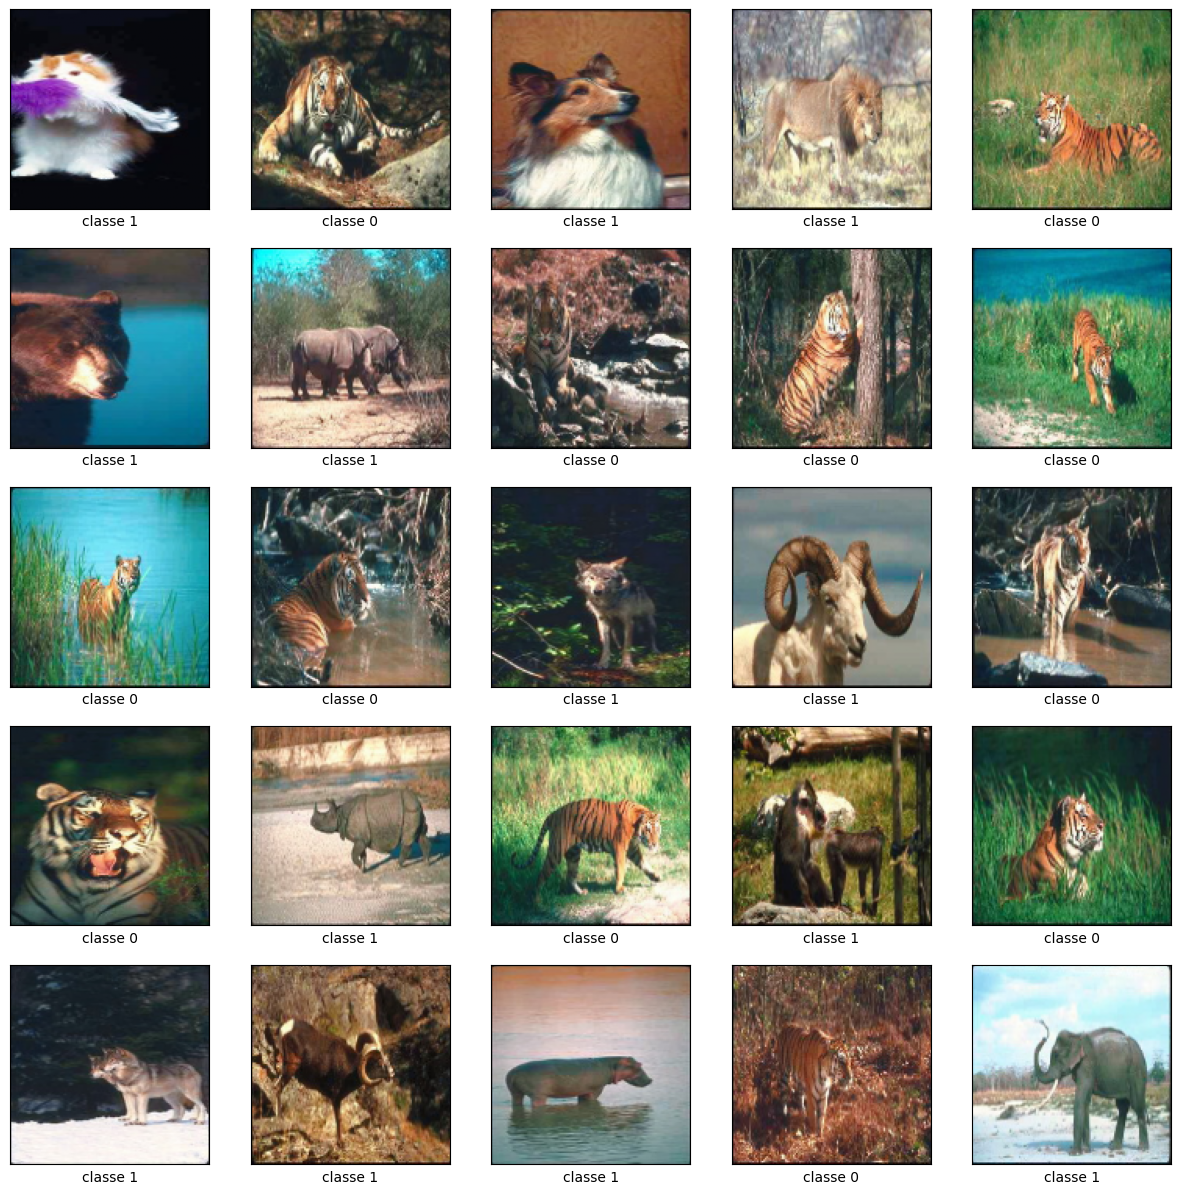

In [ ]:
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['tiger','Tiger_negative_class']
X,y=create_X_y (my_path,my_classes)
print ("Nombre de données : ",X.shape[0])
print ("Taille d'une image pour connaître l'input du réseau", X[0].shape)
#print ("Distribution des labels dans le jeu d'apprentissage")
#sns.countplot(np.array(y))
#plt.title("Nombre d'éléments par classe")
# affichage
plot_examples(X,y)

# Surtout ne pas oublier de normaliser les données avec :
X=X.astype('float')
X=X/255.0

Pour les éléphants :     

Nombre de données :  200
Taille d'une image pour connaître l'input du réseau (128, 128, 3)


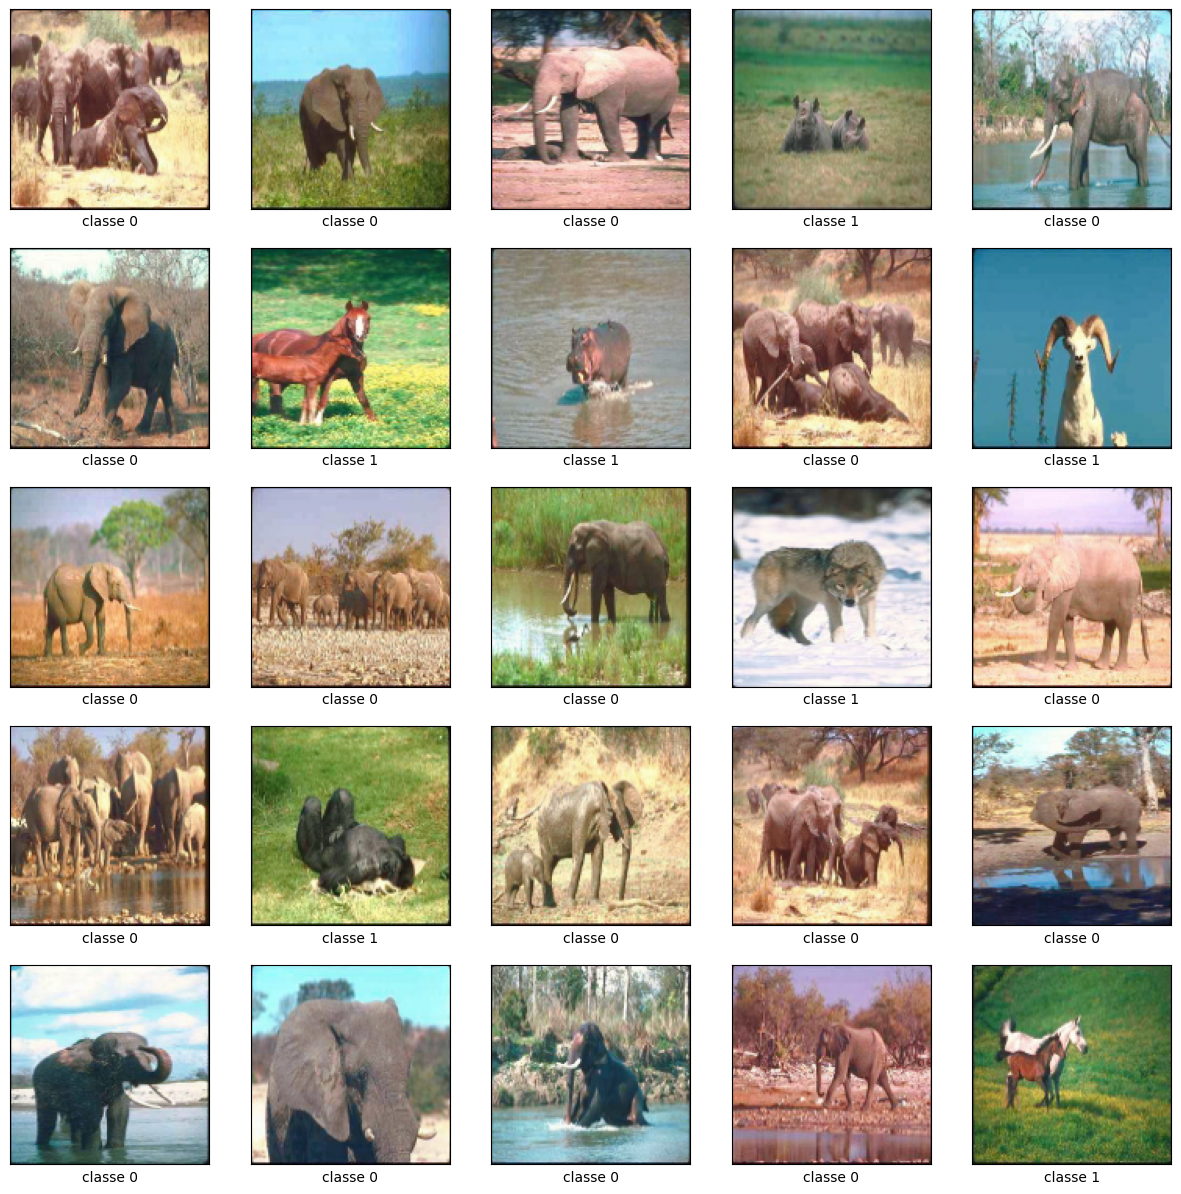

In [ ]:
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['elephant','Elephant_negative_class']
X,y=create_X_y (my_path,my_classes)
print ("Nombre de données : ",X.shape[0])
print ("Taille d'une image pour connaître l'input du réseau", X[0].shape)
#print ("Distribution des labels dans le jeu d'apprentissage")
#sns.countplot(np.array(y))
#plt.title("Nombre d'éléments par classe")
# affichage
plot_examples(X,y)

# Surtout ne pas oublier de normaliser les données avec :
X=X.astype('float')
X=X/255.0

Pour les renards :     


Nombre de données :  200
Taille d'une image pour connaître l'input du réseau (128, 128, 3)


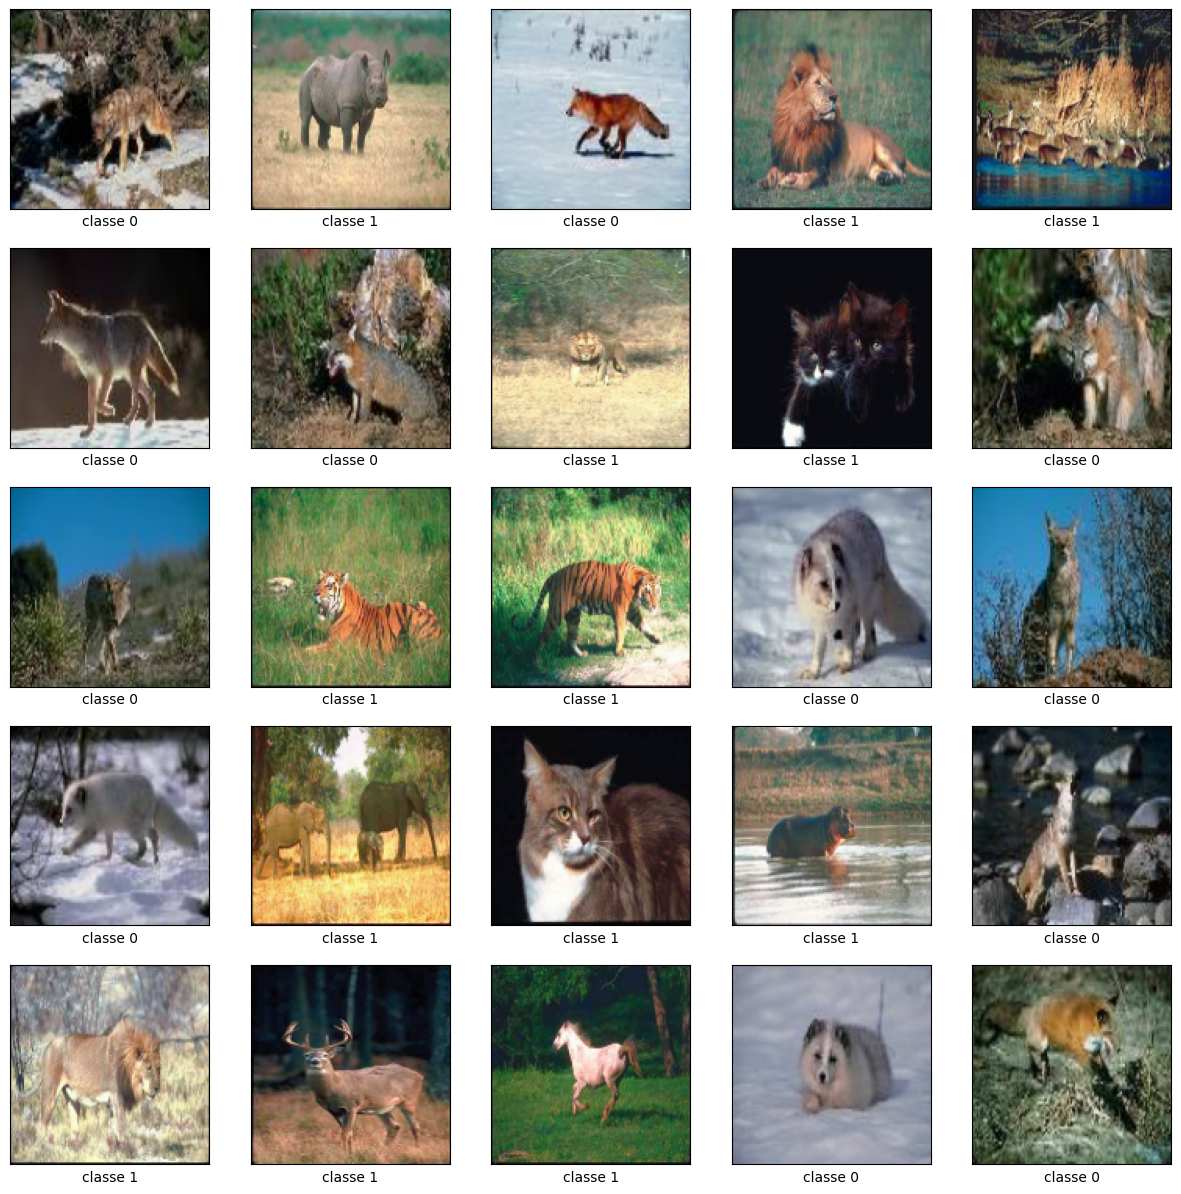

In [ ]:
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['fox','Fox_negative_class']
X,y=create_X_y (my_path,my_classes)
print ("Nombre de données : ",X.shape[0])
print ("Taille d'une image pour connaître l'input du réseau", X[0].shape)
#print ("Distribution des labels dans le jeu d'apprentissage")
#sns.countplot(np.array(y))
#plt.title("Nombre d'éléments par classe")
# affichage
plot_examples(X,y)

# Surtout ne pas oublier de normaliser les données avec :
X=X.astype('float')
X=X/255.0